### TTim example of pumping test analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ttim import *

Load data of two observation wells

In [2]:
drawdown = np.loadtxt('data/oudekorendijk_h30.dat')
to1 = drawdown[:,0] / 60 / 24
ho1 = -drawdown[:,1]
ro1 = 30

drawdown = np.loadtxt('data/oudekorendijk_h90.dat')
to2 = drawdown[:,0] / 60 / 24
ho2 = -drawdown[:,1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the sum of squared residuals at the optimum.

In [5]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)
print('rmse:', cal.rmse())

...........................................................


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,59.3965,2.107419,3.54805,-inf,inf,10,[59.39651648331512]
Saq0,2.82147e-05,0.000010,36.2412,-inf,inf,0.0001,[2.8214708988194984e-05]


rmse: 0.05196263549245624


In [6]:
# different starting location
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=50)
cal.set_parameter(name='Saq0', initial=1.5e-5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)
print('rmse:', cal.rmse())

.............................


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,65.2661,1.609367,2.46585,-inf,inf,50,[65.26609187671102]
Saq0,1.97461e-05,0.000006,32.6499,-inf,inf,1.5e-05,[1.974612118234281e-05]


rmse: 0.034626647814826286


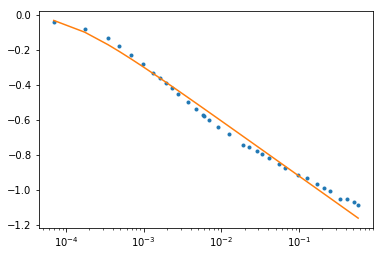

In [7]:
h = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='observed')
plt.semilogx(to1, h[0], label='model');

In [8]:
def rmse(k, Saq):
    ml = ModelMaq(kaq=k, z=(-18, -25), Saq=Saq, tmin=1e-5, tmax=1)
    w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
    ml.solve(silent=True)
    h = ml.head(ro1, 0, to1, 0)
    rv = np.sqrt(np.mean((h[0] - ho1)**2))
    return rv

In [9]:
## contour plot of objective function
# n = 20
# k = np.linspace(55, 75, n)
# S = np.linspace(1e-5, 5e-5, n)
# rsq = np.zeros((n, n))
# for i in range(n):
#     for j in range(n):
#         rsq[i, j] = rmse(k[j], S[i])
# plt.contour(k, S, rsq, 20)

### Add wellbore storage

In [10]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [11]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.05, pmax=0.5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)

......................................................................................


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,58.7003,3.214381,5.47592,-inf,inf,10,[58.70028598051911]
Saq0,2.84182e-05,0.000018,61.8205,-inf,inf,1e-05,[2.8418191952393906e-05]
rc,0.133064,0.078052,58.6572,0.050000,0.500000,0.2,[0.13306384210672262]


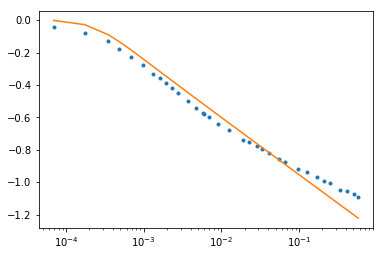

In [12]:
h = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='observed')
plt.semilogx(to1, h[0], label='model')

### Two observation wells

In [13]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=60)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.05, pmax=0.5)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name='obs2', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)

.................................


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,64.9784,2.312368,3.55867,-inf,inf,60,[64.9784146890578]
Saq0,2.55381e-05,0.000010,38.7293,-inf,inf,1e-05,[2.553807926281222e-05]
rc,0.159128,0.054844,34.4656,0.050000,0.500000,0.2,[0.15912775000937593]


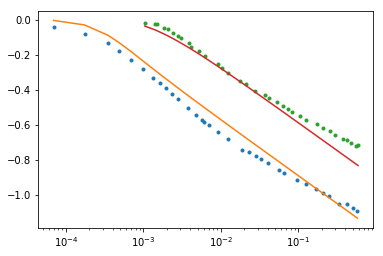

In [14]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='obs1')
plt.semilogx(to1, h1[0], label='model')
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, '.', label='obs2')
plt.semilogx(to2, h2[0], label='model')